# Truncated Gaussian prior

In [1]:
import numpy as np
import ultraplot as uplt
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

import ment

In [2]:
uplt.rc["cmap.discrete"] = False
uplt.rc["grid"] = False

<class 'ment.prior.RectangularTruncatedGaussianPrior'>


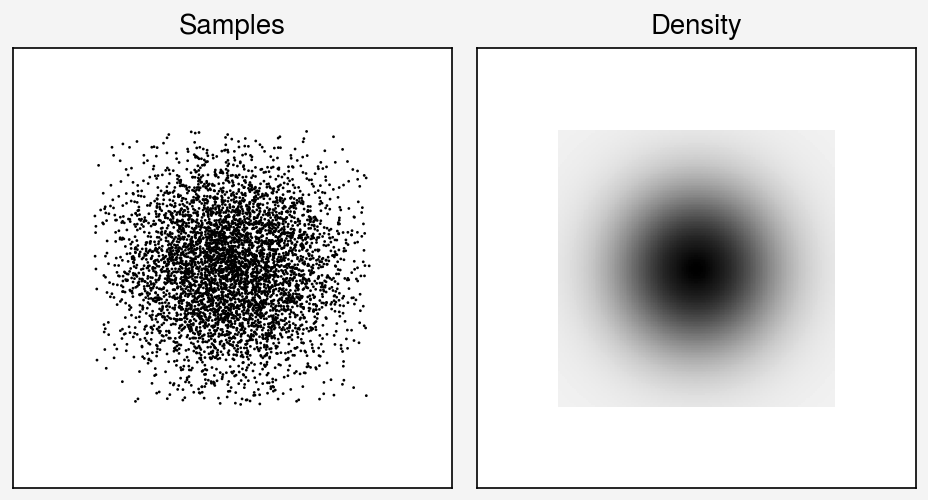

<class 'ment.prior.GaussianPrior'>


/Users/46h/repo/ment/ment/prior.py:50: UserWarning: Using MCMC to generate approximate samples.
  warnings.warn("Using MCMC to generate approximate samples.")


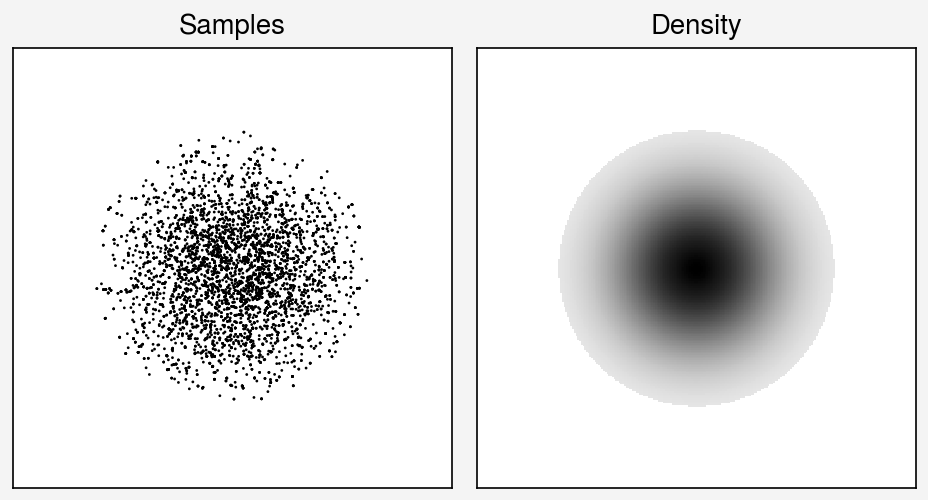

<class 'ment.prior.UniformPrior'>


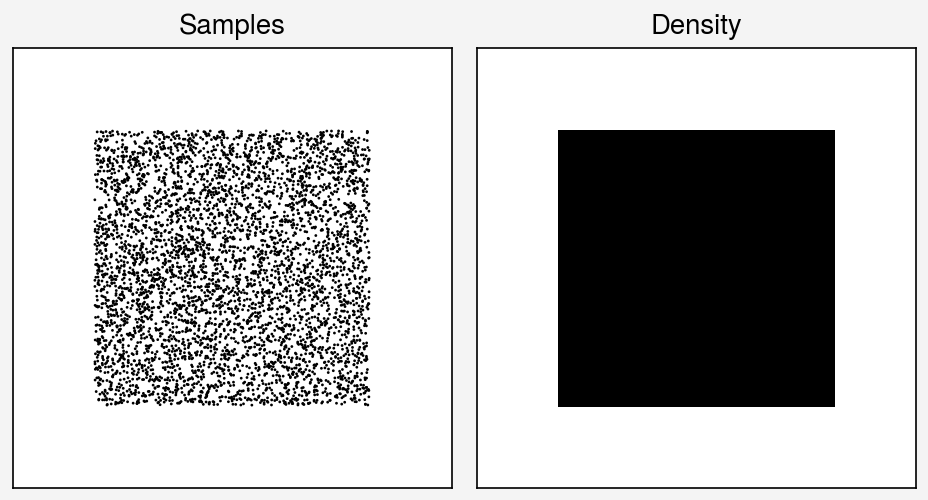

<class 'ment.prior.UniformSphericalPrior'>


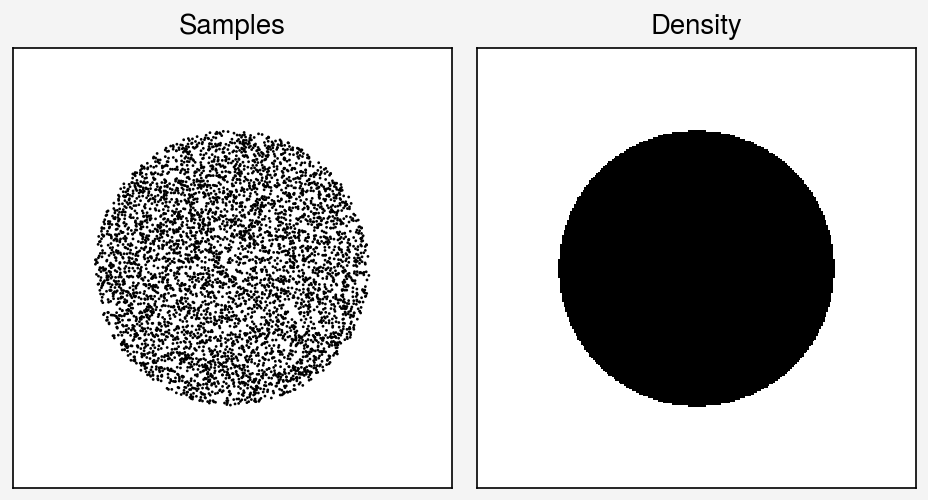

In [3]:
ndim = 2
trunc = 2.5
limits = 2 * [(-4.0, 4.0)]

priors = [
    ment.RectangularTruncatedGaussianPrior(ndim=2, scale=1.0, trunc=trunc),
    ment.GaussianPrior(ndim=2, scale=1.0, trunc=trunc),
    ment.UniformPrior(ndim=2, scale=trunc),
    ment.UniformSphericalPrior(ndim=2, scale=trunc),
]

for prior in priors:
    print(type(prior))
    
    fig, axs = uplt.subplots(ncols=2, figheight=2.5)

    x = prior.sample(5_000)
    axs[0].scatter(x[:, 0], x[:, 1], color="black", s=1.0, ec="None")
    
    shape = (256, 256)
    coords = [np.linspace(limits[i][0], limits[i][1], shape[i]) for i in range(ndim)]
    points = np.vstack([C.ravel() for C in np.meshgrid(*coords, indexing="ij")]).T
    prob = prior.prob(points).reshape(shape)
    prob = np.ma.masked_less_equal(prob, 0.0)
    prob = prob / np.max(prob)
    axs[1].pcolormesh(coords[0], coords[1], prob.T, vmax=1.00, vmin=0.0, cmap=uplt.Colormap("mono", left=0.05))

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(limits[0])
        ax.set_ylim(limits[1])
    axs[0].set_title("Samples")
    axs[1].set_title("Density")
        
    plt.show()